In [384]:
import pandas as pd
pd.set_option('display.max_columns', 300)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
from geopy.distance import great_circle
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts


In [223]:
listing_df = pd.read_csv('listings.csv')

In [224]:
crime_df = pd.read_csv('SA_crime_ward.csv')

In [288]:
crime_df.head()

,geo_level,geo_code,0_14,15_24,25_34,35_44,45_54,55_64,65+,total_raw,total_10000 _rounded
0,ward,1.0,33.0,249.0,504.0,276.0,153.0,63.0,39.0,1317.0,188.0
1,ward,2.0,27.0,249.0,408.0,282.0,174.0,69.0,39.0,1248.0,178.0
2,ward,3.0,33.0,243.0,417.0,258.0,132.0,57.0,51.0,1191.0,170.0
3,ward,4.0,39.0,306.0,447.0,309.0,180.0,132.0,90.0,1503.0,215.0
4,ward,5.0,33.0,90.0,282.0,132.0,126.0,72.0,60.0,795.0,114.0


In [290]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,total_10000 _rounded,distance_cc,distance_waterfront,distance_wine,distance_airport,price_usd_log,distance_cc_log,availability_log,availability_365_sin,price_log
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,57,-33.94739,18.47600,819,3,...,242.0,3.356482,4.390745,22.826170,3.356482,6.708084,1.210893,5.891644,-0.657009,6.708084
1,15007,Blaauwberg House,59072,Dirk,NaN,23,-33.80001,18.46063,2050,2,...,157.0,8.879955,7.518682,29.050059,8.879955,7.625595,2.183796,5.525453,-0.321594,7.625595
2,15077,Top relaxed beach living in style,59342,Georg,NaN,4,-33.85812,18.49043,1620,5,...,215.0,5.980151,5.095566,25.194771,5.980151,7.390181,1.788446,5.337538,0.609068,7.390181
3,15199,Self catering apartment,59694,Alexa,NaN,115,-33.91044,18.41239,124995,14,...,NaN,1.203734,0.663044,27.195878,1.203734,9.080573,0.185428,5.897154,-0.412091,11.736029
4,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,71,-34.03863,18.43128,1202,2,...,177.0,7.868755,9.350111,23.721691,7.868755,7.091742,2.062900,5.713733,0.986633,7.091742


In [227]:
crime_df.drop(111, inplace = True)

In [230]:
crime_df['geo_code'].astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
106    107
107    108
108    109
109    110
110    111
Name: geo_code, Length: 111, dtype: int64

In [302]:
listing_df[listing_df['neighbourhood'] == 116]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,geo_code_y,0_14_y,15_24_y,25_34_y,35_44_y,45_54_y,55_64_y,65+_y,total_raw_y,total_10000 _rounded_y
5410,15661476,Cosy corner,87746061,Bukelwa,NaN,116,-34.01487,18.62190,542,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0
7935,20924227,Empolweni homestay,150405626,Thandiwe,NaN,116,-34.01891,18.62449,457,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0
14749,38260275,Local & comfortable!,290760697,Noluthando,NaN,116,-34.02080,18.62710,949,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0


In [232]:
listing_df.drop(4957, inplace = True)

In [233]:
listing_df[listing_df['minimum_nights'] == 1125]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6194,14937323,"Pied a terre,views , chic central",63403205,Manuela,NaN,Ward 115,-33.91182,18.41313,Entire home/apt,1004,1125,1,2019-02-10,0.06,3,0


In [234]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [235]:
# Ward 112 impute mean from surounding wards (Ward 103, Ward 21, Ward 70 = 175)
# Ward 113  impute mean from surounding wards (Ward 107, Ward 1, Ward 4 = 237)
# Ward 115  impute mean from surounding wards (Ward 54, Ward 57, Ward 77, Ward 55 = 266)
# Ward 116  impute mean from surounding wards (Ward 87, Ward 18, Ward 35, Ward 76, Ward 92, Ward 79, Ward 78 = 265)

In [303]:
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 112), 175, listing_df['total_10000 _rounded_y'])

In [304]:
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 113), 237, listing_df['total_10000 _rounded_y'])
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 115), 266, listing_df['total_10000 _rounded_y'])
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 116), 265, listing_df['total_10000 _rounded_y'])

In [305]:
pd.set_option('display.max_columns', 20)

In [312]:
listing_df[listing_df.neighbourhood == 116]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,geo_code_y,0_14_y,15_24_y,25_34_y,35_44_y,45_54_y,55_64_y,65+_y,total_raw_y,total_10000 _rounded_y
5410,15661476,Cosy corner,87746061,Bukelwa,NaN,116,-34.01487,18.62190,542,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0
7935,20924227,Empolweni homestay,150405626,Thandiwe,NaN,116,-34.01891,18.62449,457,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0
14749,38260275,Local & comfortable!,290760697,Noluthando,NaN,116,-34.02080,18.62710,949,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0


In [8]:
listing_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [9]:
listing_df.shape

(24079, 16)

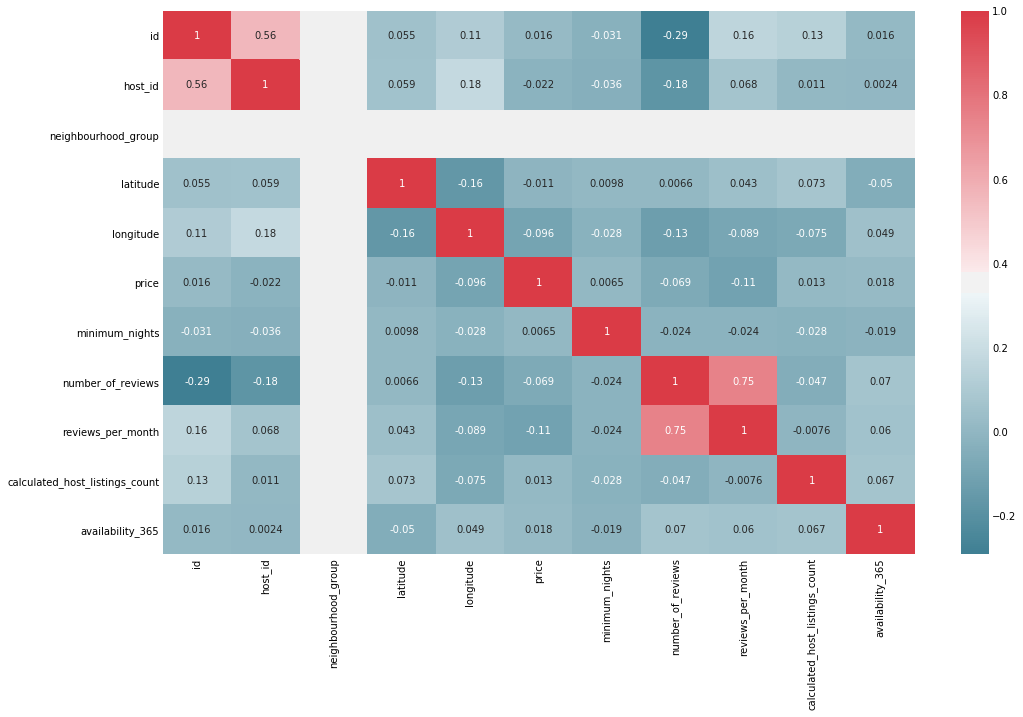

In [9]:
# Baseline Correlation heatmap 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(listing_df)

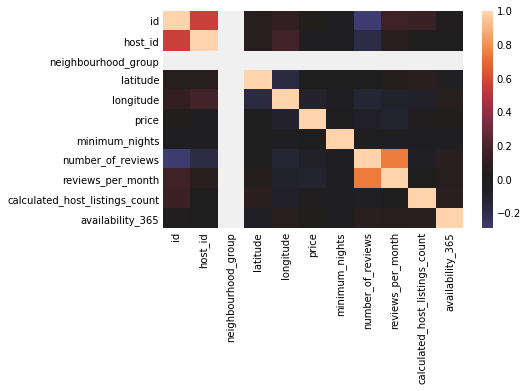

In [10]:
import seaborn as sns
sns.heatmap(listing_df.corr(), center=0);

In [11]:
#Dealing with NAs 
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               24079
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6823
reviews_per_month                  6823
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [239]:
#because the data set is over 24k, I decided to drop the nan values of reviews and last review (the same rows were nan for each)
listing_df.dropna(subset = ['reviews_per_month', 'last_review'], axis = 0, inplace = True)


In [240]:
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               17255
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [241]:
listing_df.shape

(17255, 16)

In [242]:
#for neighbourhood_group I plan to imput values based on the Wards, grouping them by where in Capetown they are


In [243]:
#Air BNB zar conversion rate is 14.3 (current rate is 16.5)
listing_df['price_usd'] = listing_df.price.apply(lambda x: x/14.23 if x>= 3000 else x)

In [244]:

listing_df[listing_df.price_usd == 0.0]

#closed listing does not exist 9775 is 20685098
listing_df.drop(9775, inplace = True)


In [245]:
#listing append 9808 is 20736711 price is 121 USD, minimum night 7
listing_df.at[9808, 'price_usd'] = 121
listing_df.at[9808, 'minimum_nights'] = 7

In [412]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level_x',
       'geo_code_x', '0_14_x', '15_24_x', '25_34_x', '35_44_x', '45_54_x',
       '55_64_x', '65+_x', 'total_raw_x', 'total_10000 _rounded_x',
       'distance_cc', 'distance_waterfront', 'distance_wine',
       'distance_airport', 'price_usd_log', 'distance_cc_log',
       'availability_log', 'availability_365_sin', 'price_log', 'geo_level_y',
       'geo_code_y', '0_14_y', '15_24_y', '25_34_y', '35_44_y', '45_54_y',
       '55_64_y', '65+_y', 'total_raw_y', 'total_10000 _rounded_y'],
      dtype='object')

In [247]:
listing_df = pd.get_dummies(listing_df, columns=['room_type'])

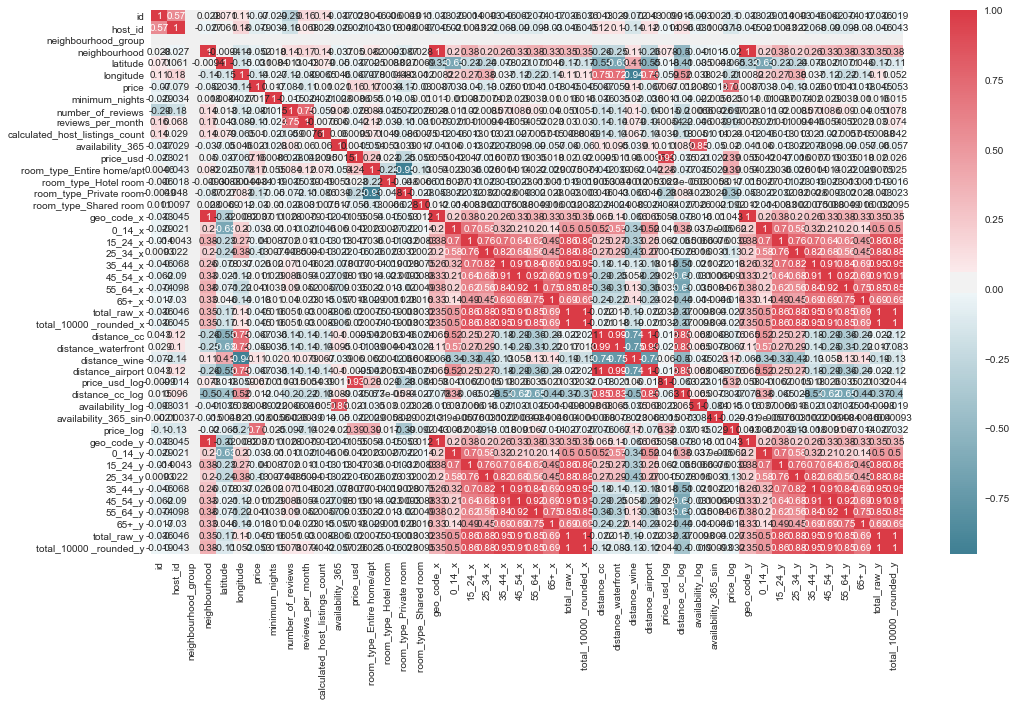

In [411]:
correlation_heatmap(listing_df)

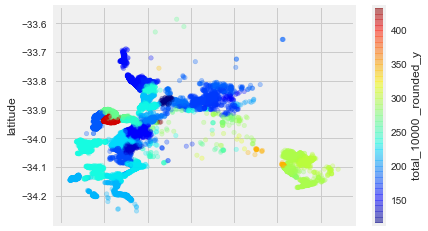

In [414]:
listing_df.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'total_10000 _rounded_y', cmap = plt.get_cmap('jet'));

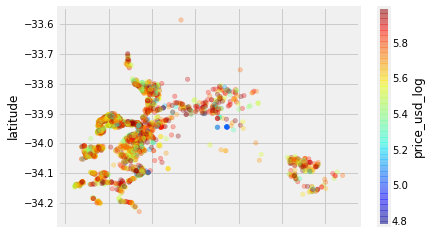

In [291]:
listing_df[listing_df['price_usd_log'].lt(6)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd_log', cmap = plt.get_cmap('jet'))

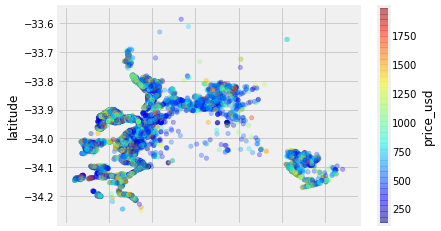

In [292]:
listing_df[listing_df['price_usd'].lt(2000)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd', cmap = plt.get_cmap('jet'))

In [293]:
listing_df.neighbourhood = listing_df.neighbourhood.map(lambda x: x.replace('Ward', ''))

AttributeError: 'int' object has no attribute 'replace'

In [294]:
listing_df.neighbourhood = listing_df.neighbourhood.astype(int)

In [295]:
listing_df = listing_df.merge(crime_df, left_on='neighbourhood', right_on = 'geo_code' ,how='left')
listing_df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,geo_code_y,0_14_y,15_24_y,25_34_y,35_44_y,45_54_y,55_64_y,65+_y,total_raw_y,total_10000 _rounded_y
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,57,-33.94739,18.47600,819,3,...,57.0,24.0,219.0,456.0,432.0,303.0,141.0,120.0,1695.0,242.0
1,15007,Blaauwberg House,59072,Dirk,NaN,23,-33.80001,18.46063,2050,2,...,23.0,39.0,270.0,357.0,210.0,153.0,42.0,30.0,1101.0,157.0
2,15077,Top relaxed beach living in style,59342,Georg,NaN,4,-33.85812,18.49043,1620,5,...,4.0,39.0,306.0,447.0,309.0,180.0,132.0,90.0,1503.0,215.0
3,15199,Self catering apartment,59694,Alexa,NaN,115,-33.91044,18.41239,124995,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,71,-34.03863,18.43128,1202,2,...,71.0,39.0,273.0,405.0,246.0,132.0,126.0,18.0,1239.0,177.0
5,15331,Mountview Accommodation,60058,Francis,NaN,60,-33.97069,18.49697,714,2,...,60.0,45.0,228.0,336.0,234.0,99.0,87.0,45.0,1074.0,153.0
6,15480,In hip designer district of Cape T.,60443,Jean,NaN,115,-33.92876,18.42247,705,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15704,Hollywood Mansion & Spa Camps Bay with Butler,61441,Kevin,NaN,54,-33.96462,18.37595,17902,4,...,54.0,36.0,294.0,282.0,276.0,207.0,132.0,48.0,1275.0,182.0
8,16259,Chambery - luxury self catering,63255,Cheryl,NaN,59,-33.99463,18.46505,1256,2,...,59.0,33.0,150.0,324.0,258.0,207.0,87.0,15.0,1074.0,153.0
9,17270,VILLA CARRARA W SELF-CATERING-VIEWS renovated May,66986,Henri,NaN,115,-33.91073,18.40866,1304,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
listing_df.neighbourhood

0         57
1         23
2          4
3        115
4         71
        ... 
17249    115
17250      2
17251     54
17252      5
17253     54
Name: neighbourhood, Length: 17254, dtype: int64

In [254]:
#city center wards df['city_center'] = wards == 77,54,115
#listing_df['neighbourhood_group'] = listing_df['neighbourhood_group'].map(lambda x: if x == 74]
                                                                          
#[74, 77, 54, 57, 59, 58, 60, 47, 46, 48, 49, 52, 51, 53, 56, 50, 31, 40, 41, 42, 44, 45]
#Metro_North = [4, 5, 1, 27, 26, 30, 28]
#Metro_South = [69, 71, 62, 73, 72, 63, 66, 65, 67, 80, 33, 38, 34, 37, 43] 





In [255]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level',
       'geo_code', '0_14', '15_24', '25_34', '35_44', '45_54', '55_64', '65+',
       'total_raw', 'total_10000 _rounded'],
      dtype='object')

In [256]:
#distance from city center
# 33.9249° S, 18.4241° E cape town city center


In [257]:
# city center -33.9249, 18.4241
# VA Water Front -33.9036, 18.4205
# Wine Lands -34.075691, 18.843266
# Airport -33.9715, 18.6021


from geopy.distance import great_circle
city_center = (-33.9249,18.4241)
listing_df['distance_cc'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(city_center, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)



In [258]:
va_water = (-33.9036, 18.4205)
listing_df['distance_waterfront'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(va_water, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [259]:
wine_lands = (-34.075691, 18.843266)
listing_df['distance_wine'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(wine_lands, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [260]:
airport = (-33.9249,18.4241)
listing_df['distance_airport'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(airport, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [261]:
listing_df['distance_cc']

0         3.356482
1         8.879955
2         5.980151
3         1.203734
4         7.868755
           ...    
17249     0.506106
17250    11.165350
17251     2.326342
17252     7.933913
17253     2.008320
Name: distance_cc, Length: 17254, dtype: float64

In [262]:
listing_df['minimum_nights'].unique()

array([   3,    2,    5,   14,    4,    7,    1,    6,   30,   90,  360,
         10,   45,    8,   20,   21,   28,   42,   12,   31,  240,  180,
         15,   60,   11,  365,    9,  120,   13,  210,  356,   25,  100,
         32,   18,   24, 1125,   93,  168,  186,   27,  150,   89,   29,
        300,   94,   22,   33,  183])

In [263]:
#drop or not to drop that is the question
listing_df[listing_df['minimum_nights'] == 1125]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,35_44,45_54,55_64,65+,total_raw,total_10000 _rounded,distance_cc,distance_waterfront,distance_wine,distance_airport
4956,14937323,"Pied a terre,views , chic central",63403205,Manuela,NaN,115,-33.91182,18.41313,1004,1125,...,NaN,NaN,NaN,NaN,NaN,NaN,1.101073,0.707935,27.117279,1.101073


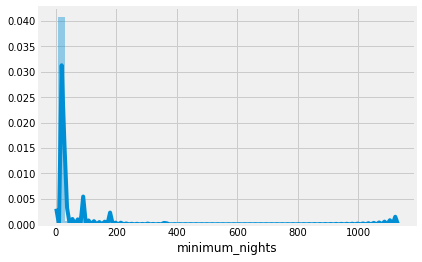

In [264]:
sns.distplot(listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'])

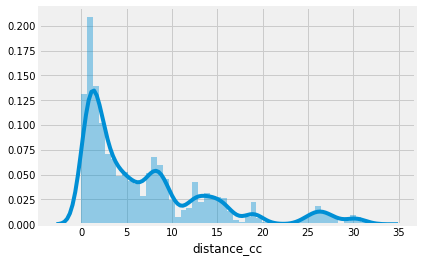

In [265]:
sns.distplot(listing_df['distance_cc'])

In [266]:
sns.jointplot(x = listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'],
               y = listing_df[listing_df['minimum_nights'] > 7]['price_usd_log'])

KeyError: 'price_usd_log'

In [267]:
# ANOVA
# room_type_Entire home/apt
# distance_cc

# price_usd

In [268]:
listing_df['minimum_nights'] = listing_df['minimum_nights'].astype(int)
listing_df['price_usd'] = listing_df['price_usd'].astype(int)

In [401]:
# minimum nights > 4
# min nights < 4 
# mean min_nights is 3.93
# Prices of Air BNBs with less than 4 minimum nights is statistically different than houses with minimum nights greater or equal to 4. 
#2 sample ttest

stats.ttest_ind(listing_df[listing_df['minimum_nights'] >= 4]['price_usd_log'], listing_df[listing_df['minimum_nights'] < 4]['price_usd_log']) 


Ttest_indResult(statistic=3.1795108064722886, pvalue=0.0014778454576875196)

In [399]:
# As we get closer the the City Center, the mean of the price changes. 
#WORK ON THIS ONE 

x = listing_df[listing_df['distance_cc'] >= 10]['price_usd_log']
y = listing_df[(listing_df['distance_cc'] > 8) & (listing_df['distance_cc'] < )]['price_usd_log']
z = listing_df[(listing_df['distance_cc'] >= 1) & (listing_df['distance_cc'] < 1)]['price_usd_log']
ten_miles = stats.f_oneway(x, y, z)

x = listing_df[listing_df['distance_cc'] >= 8]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 8]['price_usd_log']
eight_miles = stats.f_oneway(x, y)

x = listing_df[listing_df['distance_cc'] >= 1]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 1]['price_usd_log']
one_mile = stats.f_oneway(x, y)

print('10 miles: ', ten_miles)
print('8 miles: ', eight_miles)
print('1 mile: ', one_mile)


SyntaxError: invalid syntax (<ipython-input-399-410e5b1e70c8>, line 5)

In [400]:
stats.ttest_ind(listing_df[listing_df['distance_cc'] < 1]['price'], listing_df[listing_df['distance_cc'] >= 1]['price_usd']) 

Ttest_indResult(statistic=19.54417274806057, pvalue=3.7557401151043536e-84)

In [410]:
stats.ttest_ind(listing_df[listing_df['total_10000 _rounded_y'] >= 235.17]['price'], listing_df[listing_df['total_10000 _rounded_y'] <235.17]['price'])

Ttest_indResult(statistic=-14.755982184486566, pvalue=5.599850000224567e-49)

In [273]:
listing_df.price_usd.describe()

count    17254.000000
mean      1009.869306
std        669.615593
min        119.000000
25%        505.000000
50%        831.500000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [274]:
listing_df['price_usd_log'] = np.log(listing_df['price_usd'])

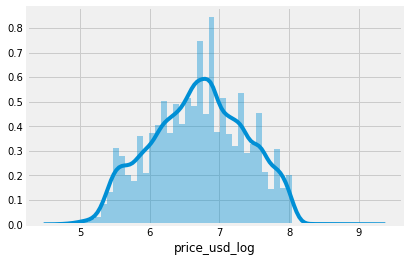

In [275]:
sns.distplot(listing_df['price_usd_log'])

In [276]:
listing_df['distance_cc_log'] = np.log(listing_df['distance_cc'])

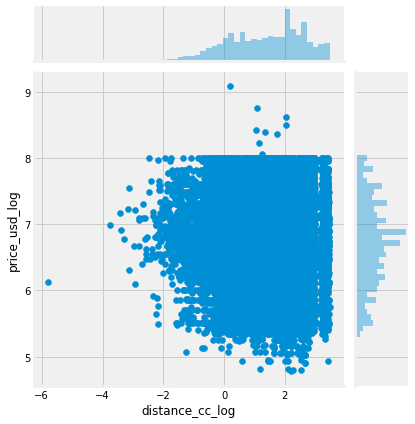

In [277]:
sns.jointplot(x = 'distance_cc_log', y = 'price_usd_log', data = listing_df);

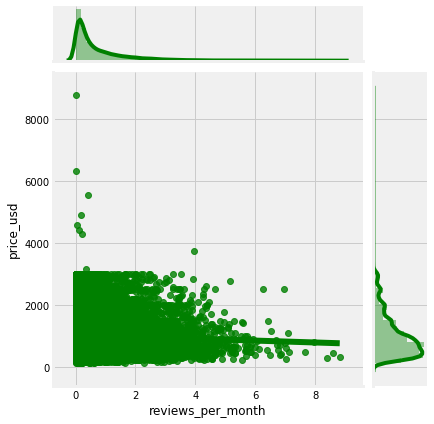

In [278]:
sns.jointplot(x = 'reviews_per_month', y = 'price_usd', data = listing_df, kind = 'reg', color = 'green');

In [279]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level',
       'geo_code', '0_14', '15_24', '25_34', '35_44', '45_54', '55_64', '65+',
       'total_raw', 'total_10000 _rounded', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log'],
      dtype='object')

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


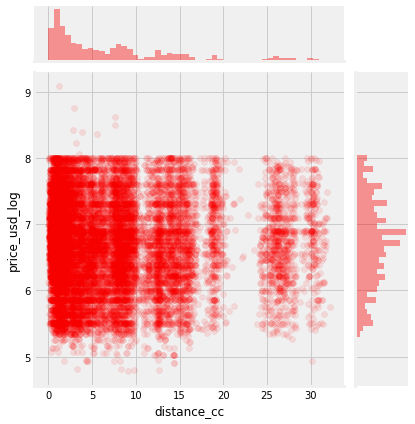

In [280]:
listing_df['availability_log'] = np.log(listing_df['availability_365'])
listing_df['availability_365_sin'] = np.sin(listing_df['availability_365'])
listing_df['price_log'] = np.log(listing_df['price'])
sns.jointplot(x = 'distance_cc', y = 'price_usd_log', data = listing_df, kind = 'scatter', color = 'red', alpha = 0.1);


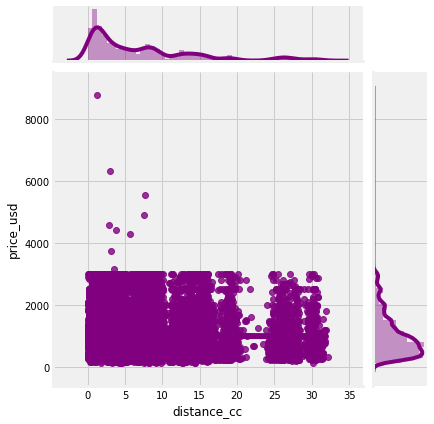

In [281]:
sns.jointplot(x = 'distance_cc', y = 'price_usd', data = listing_df, kind = 'reg', color = 'purple');

In [282]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level',
       'geo_code', '0_14', '15_24', '25_34', '35_44', '45_54', '55_64', '65+',
       'total_raw', 'total_10000 _rounded', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [283]:
listing_df.price_usd.describe()

count    17254.000000
mean      1009.869306
std        669.615593
min        119.000000
25%        505.000000
50%        831.500000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [284]:
# baseline model: 693.3257724308925 r2:  -0.07212491057954762

subset = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', ]
x = listing_df[subset]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(y)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)


rmse:  692.9463643984295 r2:  -0.07096011303673744


In [285]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

692.9463643984295

In [58]:
#2nd baseline 
subset2 = ['neighbourhood', 'room_type_Entire home/apt']
x = listing_df[subset2]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "mean")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(x)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)

rmse:  669.5987754252504 r2:  0.0


In [59]:
641

641

In [60]:
# bin the availability

In [ ]:
#CORR CHECK 

In [323]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level_x',
       'geo_code_x', '0_14_x', '15_24_x', '25_34_x', '35_44_x', '45_54_x',
       '55_64_x', '65+_x', 'total_raw_x', 'total_10000 _rounded_x',
       'distance_cc', 'distance_waterfront', 'distance_wine',
       'distance_airport', 'price_usd_log', 'distance_cc_log',
       'availability_log', 'availability_365_sin', 'price_log', 'geo_level_y',
       'geo_code_y', '0_14_y', '15_24_y', '25_34_y', '35_44_y', '45_54_y',
       '55_64_y', '65+_y', 'total_raw_y', 'total_10000 _rounded_y'],
      dtype='object')

In [324]:
corr_check = listing_df.corr()

In [325]:
corr_check['total_10000 _rounded_y'] 

# neighbourhood = no conflicts
# latitude = no conflicts
# longitude = over .7 with distance airport, cc, waterfront
# number of reviews = over .7 reviews_per_month 
# availability 365 = over .7 availability log 
# entire house no conflicts 
# distance cc conflicts with distance waterfront and longitude 
# distance airport -.7 with wine distance?

id                               -0.018893
host_id                          -0.042568
neighbourhood_group                    NaN
neighbourhood                     0.378236
latitude                         -0.110180
longitude                         0.052251
price                            -0.053071
minimum_nights                    0.015044
number_of_reviews                 0.077653
reviews_per_month                 0.073819
calculated_host_listings_count    0.041839
availability_365                 -0.056855
price_usd                         0.025626
room_type_Entire home/apt         0.025159
room_type_Hotel room             -0.016064
room_type_Private room           -0.023092
room_type_Shared room             0.009479
geo_code_x                        0.346634
0_14_x                            0.497876
15_24_x                           0.856040
25_34_x                           0.875416
35_44_x                           0.952689
45_54_x                           0.908351
55_64_x    

In [174]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [353]:
subset3 = ['minimum_nights','number_of_reviews', 'neighbourhood', 'availability_365', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room','room_type_Shared room', 'distance_cc', 
           'distance_airport', 'latitude', 'total_10000 _rounded_y']


df_features = listing_df[subset3]
target = listing_df['price_usd_log']
len(subset3)

12

In [354]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias = False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
model2 = LinearRegression()

model2 = model2.fit(df_poly2, target)

In [355]:
model2 = sm.OLS(y, poly2_data).fit()
model2.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_usd_log   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     39.59
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:35:57   Log-Likelihood:                -16454.
No. Observations:               17254   AIC:                         3.303e+04
Df Residuals:                   17194   BIC:                         3.349e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4414      0.233      1.891      0.059      -0.016       0.899
x2            -0.2443      0.075     -3.264      0.001      -0.391      -0.098
x3            -0.1564      0.116     -1.351      0.177      -0.383       0.070
x4            -0.0167      0.012     -1.383      0.167      -0.040       0.007
x5          3033.8389    502.544      6.037      0.000    2048.801    4018.877
x6          3039.6423    503.056      6.042      0.000    2053.601    4025.684
x7          3023.3377    502.591      6.016      0.000    2038.208    4008.468
x8          3033.7605    503.418      6.026      0.000    2047.010    4020.511
x9            -1.4602      0.247     -5.911      0.000      -1.944      -0.976
x10           -1.4601      0.247     -5.910      0.000      -1.944      -0.976
x11          282.6312     47.569      5.941      0.000     189.390     375.872
x12           -0.2132      0.068     -3.149      0.002      -0.346      -0.080
x13        -1.314e-07   1.39e-06     -0.095      0.925   -2.86e-06    2.59e-06
x14         1.039e-05   1.52e-05      0.683      0.494   -1.94e-05    4.02e-05
x15         4.916e-06   1.67e-05      0.294      0.769   -2.79e-05    3.77e-05
x16        -5.517e-06   3.41e-06     -1.620      0.105   -1.22e-05    1.16e-06
x17            0.1059      0.061      1.732      0.083      -0.014       0.226
x18            0.1289      0.077      1.685      0.092      -0.021       0.279
x19            0.0996      0.061      1.628      0.103      -0.020       0.219
x20            0.1070      0.084      1.270      0.204      -0.058       0.272
x21         6.809e-05   6.21e-05      1.097      0.273   -5.36e-05       0.000
x22            0.0001   6.22e-05      1.990      0.047    1.84e-06       0.000
x23            0.0162      0.009      1.883      0.060      -0.001       0.033
x24         3.847e-06   7.16e-06      0.537      0.591   -1.02e-05    1.79e-05
x25         3.459e-06   1.69e-06      2.041      0.041    1.37e-07    6.78e-06
x26        -2.129e-06   6.08e-06     -0.350      0.726    -1.4e-05    9.78e-06
x27         3.165e-06   1.22e-06      2.595      0.009    7.75e-07    5.56e-06
x28           -0.0600      0.019     -3.188      0.001      -0.097      -0.023
x29           -0.0532      0.019     -2.806      0.005      -0.090      -0.016
x30           -0.0615      0.019     -3.265      0.001      -0.098      -0.025
x31           -0.0695      0.021     -3.321      0.001      -0.111      -0.028
x32           -0.0001   1.92e-05     -5.497      0.000      -0.000    -6.8e-05
x33           -0.0001    1.9e-05     -6.513      0.000      -0.000   -8.67e-05
x34           -0.0090      0.003     -3.245      0.001      -0.014      -0.004
x35         -1.43e-06   2.33e-06     -0.614      0.539   -5.99e-06    3.14e-06
x36        -3.153e-05   8.93e-06     -3.532      0.000    -4.9e-05    -1.4e-05
x3

In [356]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)

In [357]:
poly3_columns

['minimum_nights',
 'number_of_reviews',
 'neighbourhood',
 'availability_365',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'distance_cc',
 'distance_airport',
 'latitude',
 'total_10000 _rounded_y',
 'minimum_nights^2',
 'minimum_nights number_of_reviews',
 'minimum_nights neighbourhood',
 'minimum_nights availability_365',
 'minimum_nights room_type_Entire home/apt',
 'minimum_nights room_type_Hotel room',
 'minimum_nights room_type_Private room',
 'minimum_nights room_type_Shared room',
 'minimum_nights distance_cc',
 'minimum_nights distance_airport',
 'minimum_nights latitude',
 'minimum_nights total_10000 _rounded_y',
 'number_of_reviews^2',
 'number_of_reviews neighbourhood',
 'number_of_reviews availability_365',
 'number_of_reviews room_type_Entire home/apt',
 'number_of_reviews room_type_Hotel room',
 'number_of_reviews room_type_Private room',
 'number_of_reviews room_type_Shared room',
 'number_of_reviews dist

In [358]:
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_usd_log   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     12.77
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:36:10   Log-Likelihood:                -16214.
No. Observations:               17254   AIC:                         3.288e+04
Df Residuals:                   17029   BIC:                         3.462e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -121.1026    201.823     -0.600      0.548    -516.697     274.492
x2           121.5238     51.588      2.356      0.019      20.406     222.642
x3            50.1859     50.202      1.000      0.317     -48.215     148.587
x4            -1.7841      4.958     -0.360      0.719     -11.502       7.934
x5          1503.9204   1649.434      0.912      0.362   -1729.141    4736.981
x6         -4310.5881   3207.023     -1.344      0.179   -1.06e+04    1975.508
x7          2806.7028   1680.359      1.670      0.095    -486.974    6100.380
x8            -3.4032      4.755     -0.716      0.474     -12.723       5.917
x9            38.5868    119.047      0.324      0.746    -194.758     271.932
x10           38.5101    119.048      0.323      0.746    -194.837     271.857
x11           80.7944    210.522      0.384      0.701    -331.851     493.439
x12           -8.2789     24.838     -0.333      0.739     -56.964      40.406
x13           -0.0430      0.036     -1.178      0.239      -0.114       0.029
x14           -0.0053      0.025     -0.212      0.832      -0.054       0.044
x15            0.0621      0.036      1.726      0.084      -0.008       0.133
x16           -0.0012      0.003     -0.474      0.635      -0.006       0.004
x17          -49.7246     51.010     -0.975      0.330    -149.710      50.261
x18          -25.9810     55.312     -0.470      0.639    -134.398      82.436
x19          -49.8828     51.114     -0.976      0.329    -150.072      50.306
x20            4.5566     66.635      0.068      0.945    -126.055     135.168
x21            0.0329      0.081      0.406      0.685      -0.126       0.192
x22           -0.0014      0.080     -0.018      0.986      -0.159       0.156
x23           -9.2674     14.305     -0.648      0.517     -37.307      18.773
x24            0.0180      0.015      1.234      0.217      -0.011       0.047
x25            0.0003      0.002      0.141      0.888      -0.004       0.004
x26            0.0132      0.006      2.274      0.023       0.002       0.025
x27            0.0022      0.001      1.836      0.066      -0.000       0.005
x28           28.1162     13.679      2.055      0.040       1.304      54.929
x29           27.1133     13.837      1.959      0.050      -0.009      54.235
x30           28.1806     13.688      2.059      0.040       1.351      55.010
x31           38.0805     29.513      1.290      0.197     -19.767      95.928
x32            0.0247      0.018      1.381      0.167      -0.010       0.060
x33            0.0319      0.018      1.794      0.073      -0.003       0.067
x34            8.5346      3.604      2.368      0.018       1.469      15.600
x35           -0.0017      0.003     -0.487      0.626      -0.008       0.005
x36            0.0120      0.009      1.337      0.181      -0.006       0.030
x3

In [359]:
#using sklearn.model_selection we will be using the train test split
#we name them as xtrain and ytrain then xtest and ytest
from sklearn.model_selection import train_test_split

#scale data 
scaler = StandardScaler()
x_standin = scaler.fit_transform(df_features)
x_standin = pd.DataFrame(data = target, columns = df_features.columns)

x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state = 42, test_size=0.2)

print('Training set - Features:', x_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', x_test.shape, 'Target:', y_test.shape)

Training set - Features: (13803, 12) Target: (13803,)
Training set - Features: (3451, 12) Target: (3451,)


In [360]:


model_lr = LinearRegression()
model_lr = model_lr.fit(x_train, y_train)
y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)

y = listing_df['price_usd']
x = df_features



In [361]:
y.describe()


count    17254.000000
mean      1009.869306
std        669.615593
min        119.000000
25%        505.000000
50%        831.500000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [362]:
df_features

,minimum_nights,number_of_reviews,neighbourhood,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_airport,latitude,total_10000 _rounded_y
0,3,54,57,362,1,0,0,0,3.356482,3.356482,-33.94739,242.0
1,2,27,23,251,1,0,0,0,8.879955,8.879955,-33.80001,157.0
2,5,5,4,208,0,0,1,0,5.980151,5.980151,-33.85812,215.0
3,14,2,115,364,1,0,0,0,1.203734,1.203734,-33.91044,266.0
4,2,8,71,303,1,0,0,0,7.868755,7.868755,-34.03863,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17249,1,2,115,330,1,0,0,0,0.506106,0.506106,-33.92548,266.0
17250,1,2,2,77,1,0,0,0,11.165350,11.165350,-33.89843,178.0
17251,2,1,54,343,1,0,0,0,2.326342,2.326342,-33.92368,182.0
17252,1,1,5,172,1,0,0,0,7.933913,7.933913,-33.87748,114.0


In [363]:
out = listing_df.reset_index(drop=True).T.drop_duplicates().T.set_index(listing_df.index)


In [364]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17254 entries, 0 to 17253
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minimum_nights             17254 non-null  int64  
 1   number_of_reviews          17254 non-null  int64  
 2   neighbourhood              17254 non-null  int64  
 3   availability_365           17254 non-null  int64  
 4   room_type_Entire home/apt  17254 non-null  uint8  
 5   room_type_Hotel room       17254 non-null  uint8  
 6   room_type_Private room     17254 non-null  uint8  
 7   room_type_Shared room      17254 non-null  uint8  
 8   distance_cc                17254 non-null  float64
 9   distance_airport           17254 non-null  float64
 10  latitude                   17254 non-null  float64
 11  total_10000 _rounded_y     17254 non-null  float64
dtypes: float64(4), int64(4), uint8(4)
memory usage: 1.3 MB


In [365]:

y = listing_df['price_usd_log']
x= df_features
x= sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

In [366]:
df_features.columns

Index(['minimum_nights', 'number_of_reviews', 'neighbourhood',
       'availability_365', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_airport', 'latitude', 'total_10000 _rounded_y'],
      dtype='object')

In [367]:
#calculate training errors
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

Mean Absolute Error: 0.5138158506991578
Mean Squared Error: 0.40575336647915816
Root Mean Squared Error: 0.6369877286723491


824.797043223953

In [368]:
#calculte test errors 
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.5141503629625935
Mean Squared Error: 0.40631307717633774
Root Mean Squared Error: 0.6374269190866807


In [369]:
model3 = LinearRegression()
model3 = model3.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

In [370]:
train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse))
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

Training Error: 0.5138158506991578
Testing Error: 0.6374269190866807


824.797043223953

In [371]:

lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train,y_train)
y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

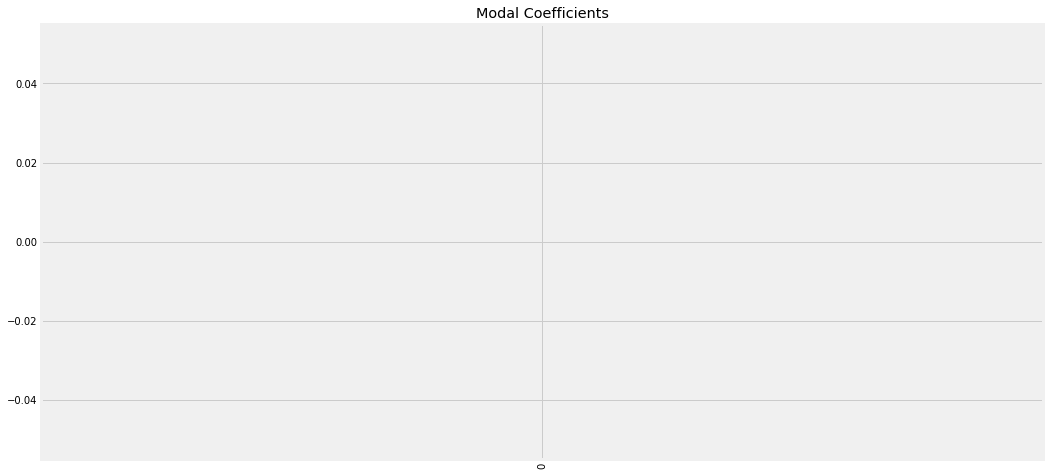

In [372]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))


In [397]:
# LASSO MODEL

lasso1 = Lasso(alpha=.1, normalize=False)
lasso1.fit(x_train,y_train)

y_train_lasso1 = lasso1.predict(x_train)
y_pred_lasso1 = lasso1.predict(x_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )


Training Error: 8.142407686031996
Testing Error: 10.769503905609993
